In [152]:
import pandas as pd
from datetime import datetime
import json
!pip install folium
import folium as folium
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
file = open('archive_part3/global_protests.json', 'r')
protest_data = json.load(file)
features = protest_data['features']
features

[{'type': 'Feature',
  'id': 1,
  'geometry': {'type': 'Point',
   'coordinates': [-134.40678999999994, 58.29973000000007]},
  'properties': {'OBJECTID': 1,
   'City': 'Juneau',
   'Region': 'Alaska',
   'Country': 'USA',
   'Comments': None,
   'Alias': None,
   'Date_Added': 1591056000000,
   'Batch': '2020_0602_1',
   'X_Longitude': -134.40678999999994,
   'Y_Latitude': 58.29973000000007,
   'Mailing_Abbreviation': 'AK',
   'Search_Label': 'Juneau, Alaska, USA'}},
 {'type': 'Feature',
  'id': 2,
  'geometry': {'type': 'Point',
   'coordinates': [-149.85824999999997, 61.21753000000007]},
  'properties': {'OBJECTID': 2,
   'City': 'Anchorage',
   'Region': 'Alaska',
   'Country': 'USA',
   'Comments': None,
   'Alias': None,
   'Date_Added': 1591056000000,
   'Batch': '2020_0602_1',
   'X_Longitude': -149.85824999999997,
   'Y_Latitude': 61.21753000000007,
   'Mailing_Abbreviation': 'AK',
   'Search_Label': 'Anchorage, Alaska, USA'}},
 {'type': 'Feature',
  'id': 3,
  'geometry': {'ty

In [158]:
start_date = datetime.strptime('2020-05-25', '%Y-%m-%d').date()
end_date = datetime.strptime('2020-07-31', '%Y-%m-%d').date()
protest_df = pd.DataFrame(features)
protest_df['geometry_tye'] = protest_df.geometry.apply(lambda x: x['type'])
protest_df['co-ordinate_y'] = protest_df.geometry.apply(lambda x: x['coordinates'][0])
protest_df['co-ordinate_x'] = protest_df.geometry.apply(lambda x: x['coordinates'][1])
protest_df['city'] = protest_df.properties.apply(lambda x: x['City'])
protest_df['region'] = protest_df.properties.apply(lambda x: x['Region'])
protest_df['country'] = protest_df.properties.apply(lambda x: x['Country'])
protest_df['date_added'] = protest_df.properties.apply(lambda x: datetime.fromtimestamp(x['Date_Added']/1000).date())
protest_df = protest_df[(protest_df.date_added >= start_date) & (protest_df.date_added <= end_date) & (protest_df.country == 'USA')]

In [159]:
protest_df

,type,id,geometry,properties,geometry_tye,co-ordinate_y,co-ordinate_x,city,region,country,date_added
0,Feature,1,"{'type': 'Point', 'coordinates': [-134.4067899...","{'OBJECTID': 1, 'City': 'Juneau', 'Region': 'A...",Point,-134.406790,58.299730,Juneau,Alaska,USA,2020-06-01
1,Feature,2,"{'type': 'Point', 'coordinates': [-149.8582499...","{'OBJECTID': 2, 'City': 'Anchorage', 'Region':...",Point,-149.858250,61.217530,Anchorage,Alaska,USA,2020-06-01
2,Feature,3,"{'type': 'Point', 'coordinates': [-147.7220999...","{'OBJECTID': 3, 'City': 'Fairbanks', 'Region':...",Point,-147.722100,64.845250,Fairbanks,Alaska,USA,2020-06-01
3,Feature,4,"{'type': 'Point', 'coordinates': [-86.97978999...","{'OBJECTID': 4, 'City': 'Decatur', 'Region': '...",Point,-86.979790,34.607400,Decatur,Alabama,USA,2020-06-01
4,Feature,5,"{'type': 'Point', 'coordinates': [-85.39336999...","{'OBJECTID': 5, 'City': 'Dothan', 'Region': 'A...",Point,-85.393370,31.223250,Dothan,Alabama,USA,2020-06-01
...,...,...,...,...,...,...,...,...,...,...,...
4384,Feature,4385,"{'type': 'Point', 'coordinates': [-79.97411555...","{'OBJECTID': 4385, 'City': 'Shaler', 'Region':...",Point,-79.974116,40.508449,Shaler,Pennsylvania,USA,2020-07-31
4385,Feature,4386,"{'type': 'Point', 'coordinates': [-95.05043533...","{'OBJECTID': 4386, 'City': 'Dickinson', 'Regio...",Point,-95.050435,29.460756,Dickinson,Texas,USA,2020-07-31
4386,Feature,4387,"{'type': 'Point', 'coordinates': [-79.05207380...","{'OBJECTID': 4387, 'City': 'Amherst', 'Region'...",Point,-79.052074,37.585195,Amherst,Virginia,USA,2020-07-31
4387,Feature,4388,"{'type': 'Point', 'coordinates': [-78.00401763...","{'OBJECTID': 4388, 'City': 'Louisa', 'Region':...",Point,-78.004018,38.025631,Louisa,Virginia,USA,2020-07-31


In [160]:
map = folium.Map(location=[40, -102], zoom_start=4.5)

In [161]:
# from folium.plugins import HeatMap
# protest_df = protest_df[protest_df.country == 'USA']
# protest_df = protest_df.iloc[0:2][['co-ordinate_x', 'co-ordinate_y']]
temp_df = protest_df[protest_df.country == 'USA'][['co-ordinate_x', 'co-ordinate_y']]
# HeatMap(data=protest_df[['co-ordinate_x', 'co-ordinate_y']].iloc[0], radius=0.5).add_to(map)
map = folium.Map(location=[40, -102], zoom_start=4)
for _, d in temp_df.iterrows():
    x = d['co-ordinate_x']
    y = d['co-ordinate_y']
    folium.CircleMarker([x, y],
    #                             popup=area,
                                radius=1,
                                color='red',
                                fill=True,
                                fill_opacity=1,
    #                             fill_color=color,
                               ).add_to(map)
# HeatMap(data=temp_df, radius=5).add_to(map)
map.save(outfile= "us-map.html")
map

In [162]:
map.save(outfile= "us-map.html")

/home/pi/Desktop/usu/cs-5830/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


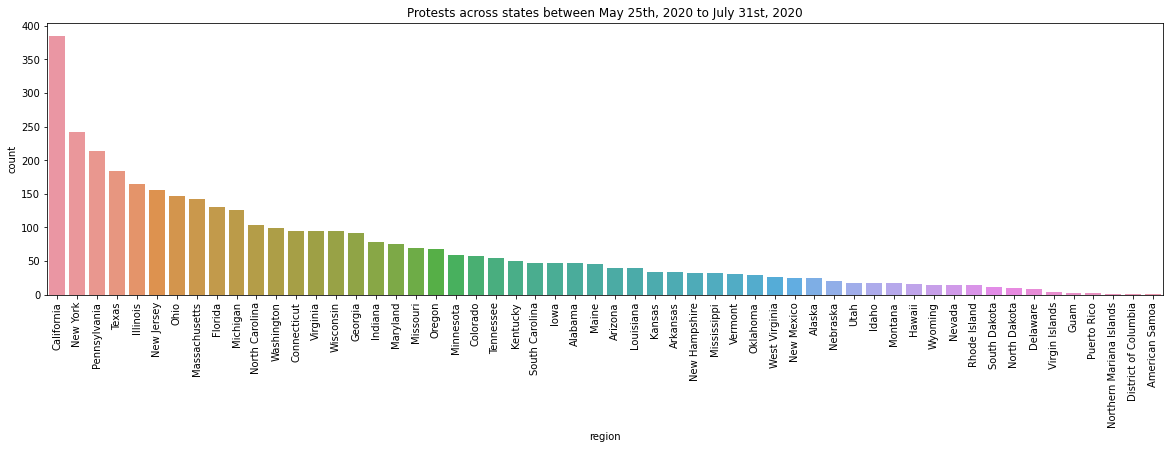

In [167]:
plt.figure(figsize=(20, 5))
f = sns.countplot(protest_df.region, order=protest_df.region.value_counts().index)
default_labels = f.get_xticklabels()
_ = f.set_xticklabels(labels=default_labels, rotation=90)
plt.title('Protests across states between May 25th, 2020 to July 31st, 2020')
plt.savefig('output/protest-grouped-us-state.jpeg', bbox_inches='tight')

In [94]:
poli = pd.read_csv('./archive_part2/demographics/politics_538.csv')
poli

,Area,Republican Vote Share,Partisan Segregation
0,"Jackson, Mississippi",0.399,0.63
1,New Orleans,0.416,0.58
2,"Baton Rouge, Louisiana",0.497,0.56
3,"Birmingham, Alabama",0.455,0.56
4,"Shreveport, Louisiana",0.444,0.56
...,...,...,...
148,"Palm Bay-Melbourne, Florida",0.587,0.12
149,"Greater Myrtle Beach area, South Carolina and ...",0.692,0.12
150,City of Honolulu,0.330,0.12
151,"Bonita Springs, Florida",0.638,0.12


In [113]:
protest_df[protest_df.city == 'Bay-Melbourne']

,type,id,geometry,properties,geometry_tye,co-ordinate_y,co-ordinate_x,city,region,country,date_added


In [98]:
protest_df[protest_df.date_added >= ]

0       2020-06-01
1       2020-06-01
2       2020-06-01
3       2020-06-01
4       2020-06-01
           ...    
4390    2020-07-31
4391    2020-08-01
4392    2020-08-14
4393    2020-08-14
4394    2020-08-14
Name: date_added, Length: 4395, dtype: object

In [116]:
poli['city'] = poli.Area.apply(lambda x: x.split(',')[0])
len(poli.city.unique())

153

<AxesSubplot:xlabel='Republican Vote Share', ylabel='events'>

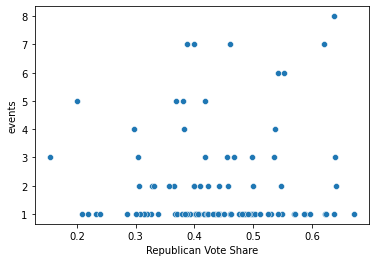

In [129]:
us_protest_df = protest_df[protest_df.country == 'USA']
grouped_protest_df = protest_df.groupby('city').agg(events=('city','count')).reset_index()
grouped_protest_df.sort_values('events', ascending=False)
joined = poli.merge(grouped_protest_df, on='city')
sns.scatterplot(x=joined['Republican Vote Share'], y=joined['events'])

In [130]:
from scipy.stats import pearsonr
pearsonr(joined['Republican Vote Share'], joined['events'])

(0.0721693197594177, 0.48704619171508257)

In [131]:
joined.shape

(95, 5)